In [1]:
import pandas as pd                           
import matplotlib.pyplot as plt                   
import seaborn as sns                             
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data
from palmerpenguins import load_penguins  # For penguins dataset

In [2]:
# Loads the penguins dataset
df = load_penguins()

# Drop variables and NaN cases, rename variable
df = df.drop(['island', 'year', 'sex'], axis=1) \
    .dropna() \
    .rename(columns={'species': 'y'})

df = df.reset_index(drop=True) # dropna in above step does adjust the index label, it simply removes whole row,

y = df.y


# Removes the y column from df
df = df.drop('y', axis=1)

#Standardizing the df
df = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns=df.columns)

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


In [3]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10)

# Fits the model to the data
km.fit(df)

# Displays the parameters of the fitted model
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

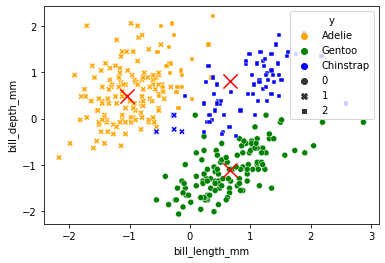

In [4]:
# Creates a scatter plot
sns.scatterplot(
    x='bill_length_mm', 
    y='bill_depth_mm',
    data=df, 
    hue=y,
    style=km.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')

- When the k value is not known in advance, a custom scorer can be used that computes the silhouette score value for different number of clusters

In [5]:
# Sets up the custom scorer
def s2(estimator,X):
    return silhouette_score(X, estimator.predict(X))

# List of values for the parameter `n_clusters`
param = range(2,10)

# KMeans object
km = KMeans(random_state=0, init='k-means++')

# Sets up GridSearchCV object and stores in grid variable
grid = GridSearchCV(
    km,
    {'n_clusters': param},
    scoring=s2,
    cv=2)

# Fits the grid object to data
grid.fit(df)

# Accesses the optimum model
best_km = grid.best_estimator_

# Displays the optimum model
best_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

- 'n_clusters' is returned as 2

Text(0, 0.5, 'Silhouette Score')

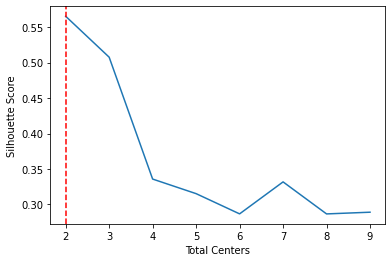

In [6]:
# Plot mean_test_scores vs. n_clusters
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Draw a vertical line, where the best model is
plt.axvline(
    x=best_km.n_clusters, 
    color='red',
    ls='--')

# Adds labels to the plot
plt.xlabel('Total Centers')
plt.ylabel('Silhouette Score')

- visualization of the clusters stored in the optimum model 'best_km'

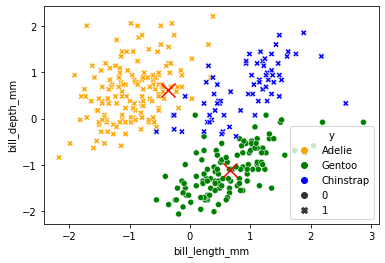

In [7]:
# Creates a scatter plot
sns.scatterplot(
    x='bill_length_mm', 
    y='bill_depth_mm',
    data=df, 
    hue=y,
    style=best_km.labels_,
    palette=['orange', 'green', 'blue'])

# Adds cluster centers to the same plot
plt.scatter(
    best_km.cluster_centers_[:, 0],
    best_km.cluster_centers_[:, 1],
    marker='x',
    s=200,
    c='red')